do this for practice on q learning, then do deeep q learning from deep lizard, then try the simlest possible model for my problem, a 2 dof arm where each joint can only be in 4 positions, up down left right. can do normal q learning to try and figure out "inverse kinematics" ie give the goal as one of the possible states the arm can be in and use q-learn to get to that position 

In [14]:
import numpy as np
import gym
import random
import time 
from IPython.display import clear_output
from matplotlib import pyplot as plt

In [15]:
env = gym.make("FrozenLake-v1", is_slippery=False)
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

print(action_space_size, state_space_size)
q_table = np.zeros((state_space_size, action_space_size))

# print(q_table)

4 16


In [16]:
# hyperparameters
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 1e-1
discount_rate = 0.99

exploration_rate = 1 # probabilty we explore
max_exploration_rate = 1
min_exploration_rate = 1e-2
exploration_decay_rate = 1e-3


In [17]:
rewards_all_episodes = []

# loop over episodes
for episode in range(num_episodes):
    
    if episode % 1000 == 0:
        print(f'Episode: {episode}')

    state = env.reset()[0]

    done = False
    rewards_current_episodes = 0

    # loop through time steps in current episode
    for step in range(max_steps_per_episode):

        # check if we should explore or exploit
        if random.uniform(0, 1) > exploration_rate: # exploit
            action = np.argmax(q_table[state])
        else:                                       # explore
            action = env.action_space.sample()
        
        # perform the decided action
        new_state, reward, done, _, info = env.step(action)

        # update q table 
        q_table[state, action] = (1 - learning_rate) * q_table[state, action] + learning_rate * (reward + discount_rate * np.max(q_table[new_state]))
        
        state = new_state
        rewards_current_episodes += reward

        if done:
            break
    
    # exploration rate decay. Exponential decay
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episodes)

Episode: 0
Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000


(10, 1000)
(10,)
[0.263 0.745 0.893 0.96  0.977 0.989 0.987 0.994 0.989 0.996]


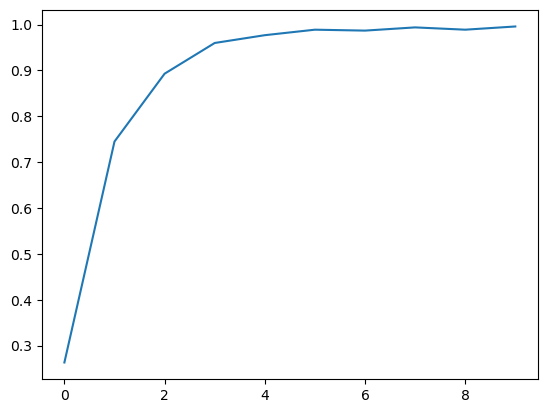

In [18]:
# average over 1000 episode long sections to track progress
arr = np.split(np.array(rewards_all_episodes), int(num_episodes/1000))
print(np.shape(arr))
avgd = np.mean(arr, axis=1)
print(np.shape(avgd))

print(avgd)
# plt.scatter(np.arange(len(avgd)), avgd)
plt.plot(np.arange(len(avgd)), avgd)

plt.show()


In [19]:
arr = np.arange(100)
narr = np.split(arr, 10)
print(narr[0])
print(np.mean(narr, axis=1))

[0 1 2 3 4 5 6 7 8 9]
[ 4.5 14.5 24.5 34.5 44.5 54.5 64.5 74.5 84.5 94.5]


In [20]:
print(q_table)

[[0.94148015 0.95099005 0.93206535 0.94148015]
 [0.94148015 0.         0.73160383 0.84090348]
 [0.45083378 0.86754632 0.07522805 0.4474948 ]
 [0.29430534 0.         0.01888432 0.04138104]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.96955928 0.         0.25094239]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.960596   0.9801     0.98009994 0.        ]
 [0.89419267 0.99       0.         0.84187336]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.98009998 0.99       0.97029899]
 [0.98009994 0.98999999 1.         0.9800999 ]
 [0.         0.         0.         0.        ]]
